In [5]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Introduction

In this notebook I will outline the various opperations that can be applied to rates described by the Boltzmann-Arenhenius equation. This is more for my own sanity as when calculating complex features of multispecies systems, such as stability, the analytical answers can get quite confusing. I start with the basic opperations on pairs of boltzmann curves and extend the work to operations on the results of these. 

# Boltzmann pairs

Given two rates described by two boltzmann type equations:
\begin{align}
        A(T) &= A_0 e^{-E_A(T_r-T_{ra})}\\
        B(T) &= B_0 e^{-E_B(T_r-T_{ra})}
\end{align}

we can apply four opperations: multiplication, division, addition and subtraction as follows.

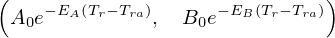

In [131]:
A0,B0,EA,EB,Tr,Tra = var("A0,B0,E_A,E_B,T_r,T_ra",real = true)
k_,T,Tref = var("k,T,T_{ref}",real = true)

A = A0 * exp(-EA*(Tr-Tra))
B = B0 * exp(-EB*(Tr-Tra))

k = 8.6173303e-5

A,B

## Multiplication

As the simplest operation on a pair of boltzmann curves the value of $A(T) B(T)$ is given by:

\begin{align}
        A(T)B(T)= C(T) = A_0 B_0 e^{-(E_A + E_B)(T_r-T_{ra})}
\end{align}

which is effectively a new boltzmann curve with parameters $C_0 = A_0 B_0$ and an $E_C = E_A + E_B$ 

In [5]:
C = A*B
simplify(C)

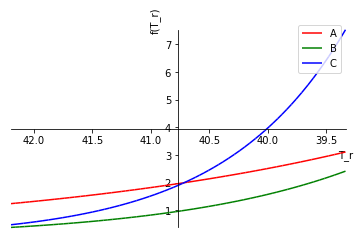

In [6]:
A_0,B_0 = 2.0,1.0
E_A,E_B = 0.32,0.64
T_ra = 1/(k*285)

A_sub = A.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
B_sub = B.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
C = (A*B).subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})

p = plot(A_sub,B_sub,C,(T_r,1/(k*275),1/(k*295)),
         legend=true,show=false)

for i in range(0,3):
    p[i].label = ["A","B","C"][i]
    p[i].line_color = ['r','g','b'][i]

p.show()

## Division

Likewise the division of two boltzmann curves is fairly straightforward:

\begin{align}
        \frac{A(T)}{B(T)} = C(T) = \frac{A_0}{B_0} e^{-(E_A - E_B)(T_r-T_{ra})}
\end{align}

where $C_0 = \frac{A_0}{B_0}$ and an $E_C = E_A - E_B$ 

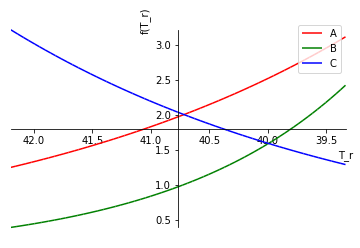

In [7]:
A_sub = A.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
B_sub = B.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
C = (A/B).subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})

p = plot(A_sub,B_sub,C,(T_r,1/(k*275),1/(k*295)),
         legend=true,show=false)

for i in range(0,3):
    p[i].label = ["A","B","C"][i]
    p[i].line_color = ['r','g','b'][i]

p.show()

## Addition

Addition is more comlpex as we cannot simply add the exponents. Instead we take use the first two terms of the taylor expansion aound the point $T_r = T_{ra}$. As addition of two rates results in another monotonically increasing function it can be approximated reasonably well by a boltzman curve. This gives a new curve with $C_0 = A_0+B_0$ and $E_C = \frac{A_0 E_A + B_0 E_B}{A_0 + B_0}$ 

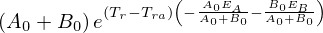

In [8]:
exp(log(A+B).series(Tr,Tra,2).removeO())

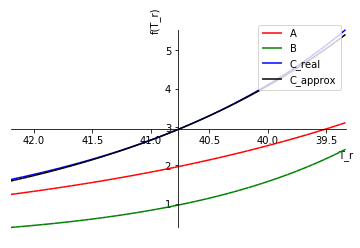

In [9]:
A_sub = A.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
B_sub = B.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
C_real = (A+B).subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
C_approx = exp(log(A+B).series(Tr,Tra,2).removeO()).subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})


p = plot(A_sub,B_sub,C_real,C_approx,(T_r,1/(k*275),1/(k*295)),
         legend=true,show=false)

for i in range(0,4):
    p[i].label = ["A","B","C_real","C_approx"][i]
    p[i].line_color = ['r','g','b','black'][i]

p.show()

# Subtraction

The subtraction of a boltzmann curve is the most complex of the elementary opperators. This is because the resultant function is unimodal with respect to temperature.

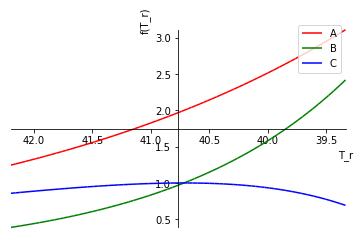

In [10]:
A_sub = A.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
B_sub = B.subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})
C_real = (A-B).subs({A0:A_0,B0:B_0,EA:E_A,EB:E_B,Tra:T_ra})

p = plot(A_sub,B_sub,C_real,(T_r,1/(k*275),1/(k*295)),
         legend=true,show=false)

for i in range(0,3):
    p[i].label = ["A","B","C"][i]
    p[i].line_color = ['r','g','b'][i]

p.show()

We can work out the temperature at which this function peaks by solving the for the temperature at the point where the derivative equals 0.

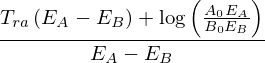

In [11]:
c_pk = solve(diff(A-B,Tr),Tr)[0]
c_pk

which can also be written as:
\begin{align}
    T_{r_{pk}} = \frac{log(\frac{E_A}{E_B})+log(\frac{A_0}{B_0})}{E_A - E_B} + T_{ra}
\end{align}



From this equation we can see that the value of $T_{r_{pk}} = T_{ra}$ when the value of $log(\frac{E_A}{E_B})+log(\frac{A_0}{B_0}) = 0$. This occurs when the two ratios are the inverses of each other (i.e. $\frac{E_A}{E_B} = \frac{1}{\frac{A_0}{B_0}} = \frac{B_0}{A_0}$)

We can also see how the position of the peak changes as we alter the individual parameters:

- $A_0$ & $B_0$ - The ratio of the normalisation constants will shift the position of the peak. If the ratio of $A_0$ to $B_0$ increases we will see the peak move upwards (in the transformed $T_r$ scale as opposed to just temperature $T$).


- $E_A$ & $E_B$ - Altering these parameters is not a simple due to the denominator. If we change the values and maintain the ratio the peak will shift upwards if thier difference decreases and downwards if the difference is greater. Likewise if the difference between the values remains the same the peak will shift down if the ratio decreases (i.e. $E_A$ is proportionally larger than $E_B$) or up if the ratio increases. 

It is also worth noting that the general behviour of the curve can be interperated in terms of the parameters. If the value of $E_A < E_B$ then the curve will point downwards whilst if $E_A > E_B$ the curve will point upwards:

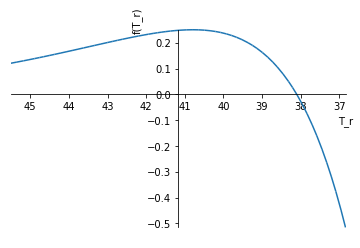

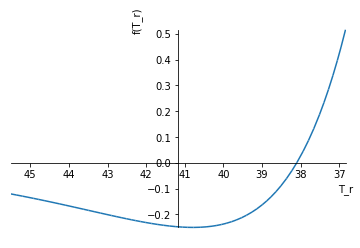

In [12]:
C_real = (A-B).subs({A0:1,B0:0.75,EA:.32,EB:0.43,Tra:T_ra})
plot(C_real,(T_r,1/(k*255),1/(k*315)))

C_real = (A-B).subs({A0:0.75,B0:1.0,EA:.43,EB:0.32,Tra:T_ra})
plot(C_real,(T_r,1/(k*255),1/(k*315)))


Also, increasing the sensitvity of both $E_A$ and $E_B$ will increase the sensitvity of this unimodal curve:

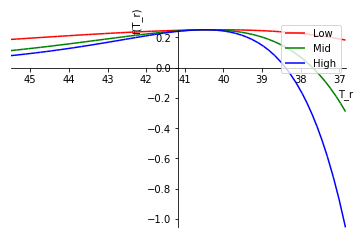

In [13]:
A_sub = A.subs({A0:1,B0:0.75,Tra:T_ra})
B_sub = B.subs({A0:1,B0:0.75,Tra:T_ra})
C = A_sub-B_sub

a = 0.32; b = 0.415

C_1 = C.subs({EA:a*0.5,EB:b*0.5})
C_2 = C.subs({EA:a,EB:b})
C_3 = C.subs({EA:a*1.3,EB:b*1.3})

p = plot(C_1,C_2,C_3,(T_r,1/(k*255),1/(k*315)),legend = true, show = false)

for i in range(0,3):
    p[i].label = ["Low","Mid","High"][i]
    p[i].line_color = ['r','g','b'][i]

p.show()


# A Mean Feild Approximation

Here I lay out some of the basics in reguards to a mean-feild approximation of carbon flux in communities. I start with the basic model used elsewhere:

\begin{align}
   \frac{1}{C_i}\frac{dC_i}{dt} = U_i - R_i - \alpha_{ii}C_i - \sum_{i \neq j}^n\alpha_{ij}C_j
\end{align}

In the mean field approximation we replace the indivdual parameters of the growth model with random variables. We also assume that the individual effects of any single species on species $i$ are negligble such that we can approximate the interspecific interactions as: $\sum_{i \neq j}^n\alpha_{ij}C_j \approx \psi_i \bar{C}$ where $\psi_i = \sum_{i \neq j}^n\alpha_{ij}C_j$. For now I also assume that intraspecific interactions are equal to 1. Thus we can write the meanfield approximation as:

\begin{align}
   \frac{1}{C}\frac{dC}{dt} = U - R - C - \psi_i \bar{C}
\end{align}

This has the equilibrial solution (or target density i.e. wilson 2003.) of:

\begin{align}
   C = {U - R - \psi_i \bar{C}}
\end{align}

assuming these parameters are normally distributed we can obtain the MGF of $C$


In [19]:
from sympy.stats import *
y,t = var("y,t")
uC,sC= var("\mu_{C},\sigma_{C}");

uU,sU= var("\mu_{U},\sigma_{U}");U = Normal('U',uU,sU)
uR,sR= var("\mu_{R},\sigma_{R}");R = Normal('R',uR,sR)
uP,sP= var("\mu_{\psi},\sigma_{\psi}");P = Normal('\psi',uP,sP)

MGF_U = exp(t*uU + ((sU*t)**2/2))
MGF_R = exp(-t*uR + ((sR*-t)**2/2))
MGF_P = exp(t*-uC*uP + ((sP*t*-uC)**2/2))
MGF_C = MGF_U * MGF_R * MGF_P

MGF_C

This can be used to get the expected value of $C$

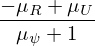

In [20]:
EC = solve(diff(MGF_C,t).subs({t:0})-uC,uC)[0]; EC

And the expected varience:

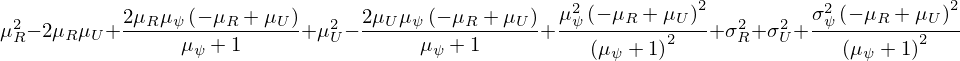

In [21]:
diff(MGF_C,t,2).subs({t:0,uC:EC})

This approach works for normally ditributed parameters but we must take into account the fact that these parameters are temperature dependent. The easiest way to do this is model them not as normaly distributed random variables but as functions of random variables.

Let $X$ be a random variable with a normal distribution with mean $\mu_{B_0}$ and standard deviation $\sigma_{B_0}$. This represents the variation in $B_0$ values in our ecosystem. As the temperature dependence of rates in our dynamic models are given by the boltzmann curve we need only substitue $X$ to get the random variable $Y$ which describes the distribution of rates:

\begin{align}
Y = X e^{-E(T_r - T_{ra})}
\end{align}

We can get the PDF of this new variable by using:
\begin{align}
f_Y(y) = \frac{f_X(y^{-1}(x))}{|y'(y^{-1}(x))|}
\end{align}

We caobtain the MGF of this variable by using the definition:
\begin{align}
\phi_Y(t) = E[e^{Yt}] = E[e^{f(X)t}]
\end{align}

To do this we need to first obtain the probability distribution of Y:

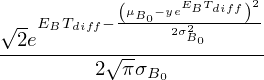

In [31]:
from sympy.stats import *
uB0,sB0,y,t = var("\mu_{B_0},\sigma_{B_0},y,t",real = true)
Tdiff = var("T_{diff}",real = true)
N = Normal('N',uB0,sB0)
B_inv = solve(B-y,B0)[0]

top = density(N)(B_inv)
bot = ((diff(B,B0).subs({B0:B_inv})))

fY = simplify((top/bot)).subs({Tr-Tra:Tdiff}); fY

and then get the MGF:

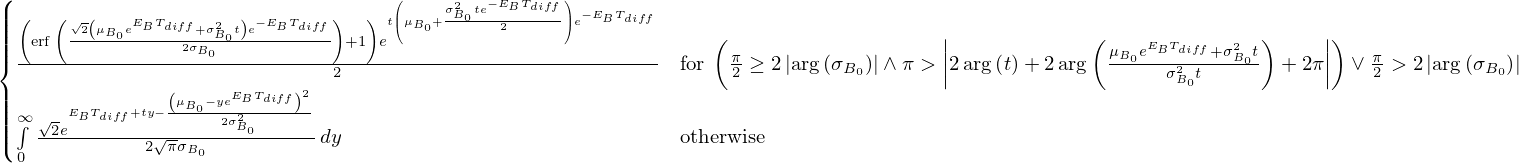

In [32]:
MGF_Y = simplify(integrate(fY*exp(t*y),(y,0,oo)));MGF_Y

This can be used to get the expected value of $Y$:

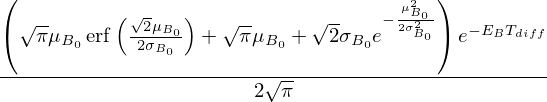

In [33]:
EY = simplify(diff(MGF_Y,t).args[0][0].subs({t:0}));EY

demonstrating that the mean rate will vary with temperature with the boltzman factor:

\begin{align}
    Y \propto e^{-E_B T_{diff}}
\end{align}

and the varience:

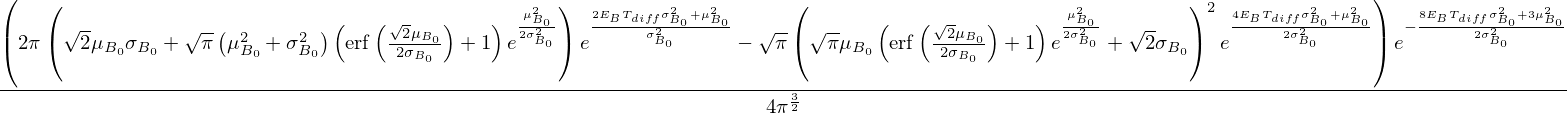

In [34]:
EY2 = diff(MGF_Y,t,t).args[0][0].subs({t:0})
VarY = EY2 - EY**2
simplify(VarY)

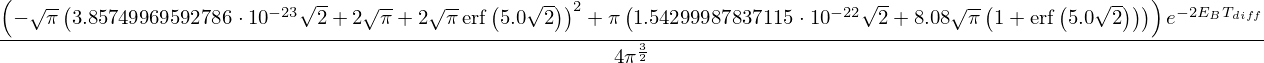

In [35]:
simplify(VarY.subs({uB0:2,sB0:0.2}))

which varies with:
    \begin{align}
        Var(Y) \propto e^{-2 E_B T_{diff}}
    \end{align}

### SMA
We can also try second moment analysis which requires only the first two moments of a random variable to get the expectation and varience of its function. First we linearise the boltzman curve by taking the log:

In [132]:
B_log=log(B).subs({Tr-Tra:Tdiff});expand_log(B_log,force=true)

We then use the taylor series expansion around $\mu_{E_B}

In [133]:
uEB,sEB,gEB = var("\mu_{E_B},\sigma_{E_B},\gamma_{E_B}")
B_log.series(EB,uEB,4).removeO()

Using this we can work out the expected value:
    \begin{align}
        E[B] &= E[log(B_0 e^{-T_{diff} \mu_{E_B}})-T_{diff}(E_B - \mu_{E_B})] \\
                  &= E[log(B_0 e^{-T_{diff} \mu_{E_B}})]-E[T_{diff}(E_B - \mu_{E_B})] \\
                  &= log(B_0 e^{-T_{diff} \mu_{E_B}}) - 0  \\
                  &= log(B_0) - T_{diff} \mu_{E_B}
    \end{align}
    
and the varience:
        \begin{align}
        E[(B - E[B])^2] &= (T_{diff})^2 \sigma_{E_B}^2
    \end{align}

In [134]:
uEB,sEB,gEB,t = var("\mu_{E_B},\sigma_{E_B},\gamma_{E_B},t")

B_diff = log(B).subs({Tr-Tra:Tdiff})

B1 = B_diff.subs({EB:uEB})
B2 = B_diff.diff(EB).subs({EB:uEB})
B3 = B_diff.diff(EB,EB).subs({EB:uEB})
B4 = B_diff.diff(EB,EB,EB).subs({EB:uEB})

B1,B2,B3,B4

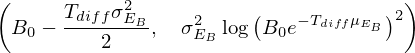

In [135]:
B_mean = B0 + B2 * (sEB**2)/2
B_var = (sEB**2)*B1**2

B_mean , B_var

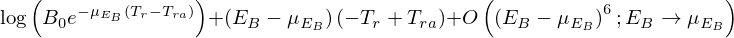

In [136]:
log(B).series(EB,uEB)

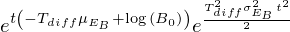

In [141]:
x = exp((log(B0)-Tdiff*uEB)*t) * exp((t*Tdiff*sEB)**2 / 2)
x

In [145]:
simplify(x.diff(t,t).subs({t:0}) - x.diff(t).subs({t:0})**2)

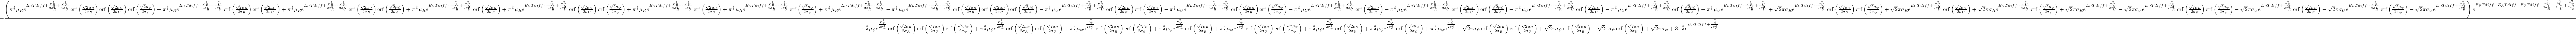

In [20]:
EU,ER,EP = var("E_U,E_R,E_P")

MGF_U = MGF_Y.subs({uB0:uU,sB0:sU,EB:EU})
MGF_R = MGF_Y.subs({uB0:uR,sB0:sR,EB:ER,t:-t})
MGF_P = MGF_Y.subs({uB0:uP,sB0:sP,EB:EP,t:-t*uC})

MGF_C = MGF_U.args[0][0] * MGF_R.args[0][0] * MGF_P.args[0][0]
EC = solve(diff(MGF_C,t).subs({t:0}) - uC,uC)[0];EC

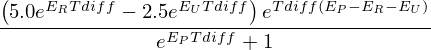

In [28]:
EC_subs = simplify(EC.subs({uU:5.0,uR:2.5,uP:1.0,sU:0.1,sR:0.1,sP:0.1}).evalf())
EC_subs

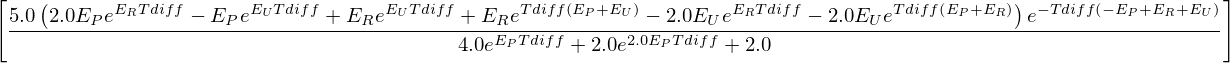

In [31]:
solve(diff(EC_subs,Tdiff)-y,y)

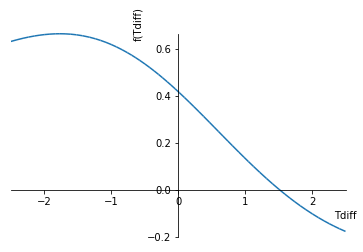

In [26]:
p = EC_subs.subs({ER:0.65,EU:0.32,EP:0.65})
plot(p.diff(Tdiff),(Tdiff,-2.5,2.5))

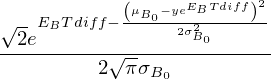

In [213]:
plt.rcParams['figure.figsize'] = 10, 10

fY_Lam = fY.subs({})

# dim = 100
# result = np.empty((dim,dim))
# y_range = np.linspace(0.01,10,num = dim)
# T_range = 1 / (k * np.linspace(275,295,num = dim))
# for i in range(0,dim):
#     for j in range(0,dim):
#         result[i,j] = pY(y_range[i],T_range[j]))

# plt.imshow(result,extent=[1/(k*275),1/(k*295),0,3],aspect="auto")
# plt.colorbar()

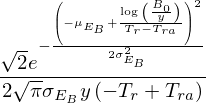

In [155]:
from sympy.stats import *
uEB,sEB,y,t = var("\mu_{E_B},\sigma_{E_B},y,t")
N = Normal('N',uEB,sEB)
B_inv = solve(B-y,EB)[0]

top = density(N)(B_inv)
bot = ((diff(B,EB).subs({EB:solve(B-y,EB)[0]})))

fY = (top/bot) ; fY

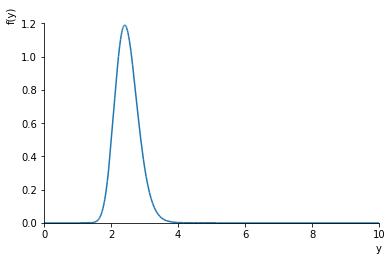

In [78]:
plot(fY.subs({uEB:0.65,sEB:0.1,B0:1.0,Tra:(1/(k*285)),Tr:(1/(k*295))}),(y,0,10))

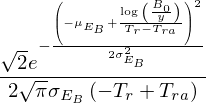

In [80]:
y*fY

In [83]:
B.subs({EB:0.65,sEB:0.1,B0:1.0,Tra:(1/(k*285)),Tr:(1/(k*295))})

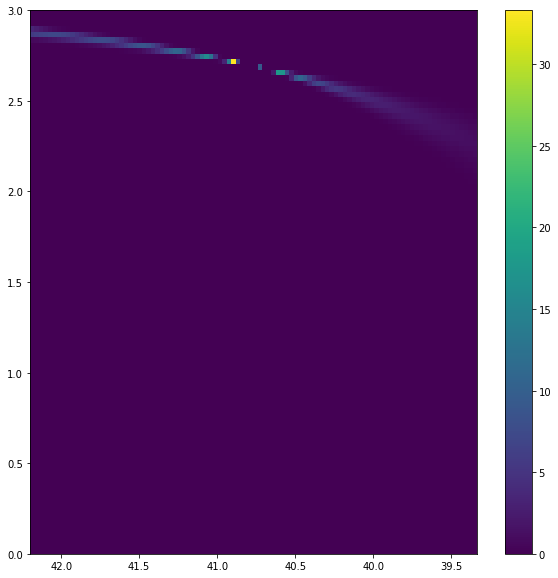

In [239]:
plt.rcParams['figure.figsize'] = 10, 10

fY_lam = fY.subs({uEB:0.65,sEB:0.1,B0:1.0,Tra:(1/(k*285))})
pY = lambdify((y,Tr),fY_lam)

dim = 100
result = np.empty((dim,dim))
y_range = np.linspace(0.01,10,num = dim)
T_range = 1 / (k * np.linspace(275,295,num = dim))
for i in range(0,dim):
    for j in range(0,dim):
        result[i,j] = (pY(y_range[i],T_range[j]))

plt.imshow(result,extent=[1/(k*275),1/(k*295),0,3],aspect="auto")
plt.colorbar()

# Normal mean feild

It might be more simple to assume a normal distributoin where the mean is described by the boltzmann function

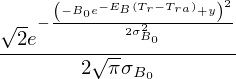

In [36]:
norm_temp_u = density(N)(y).subs({uB0:B});norm_temp_u

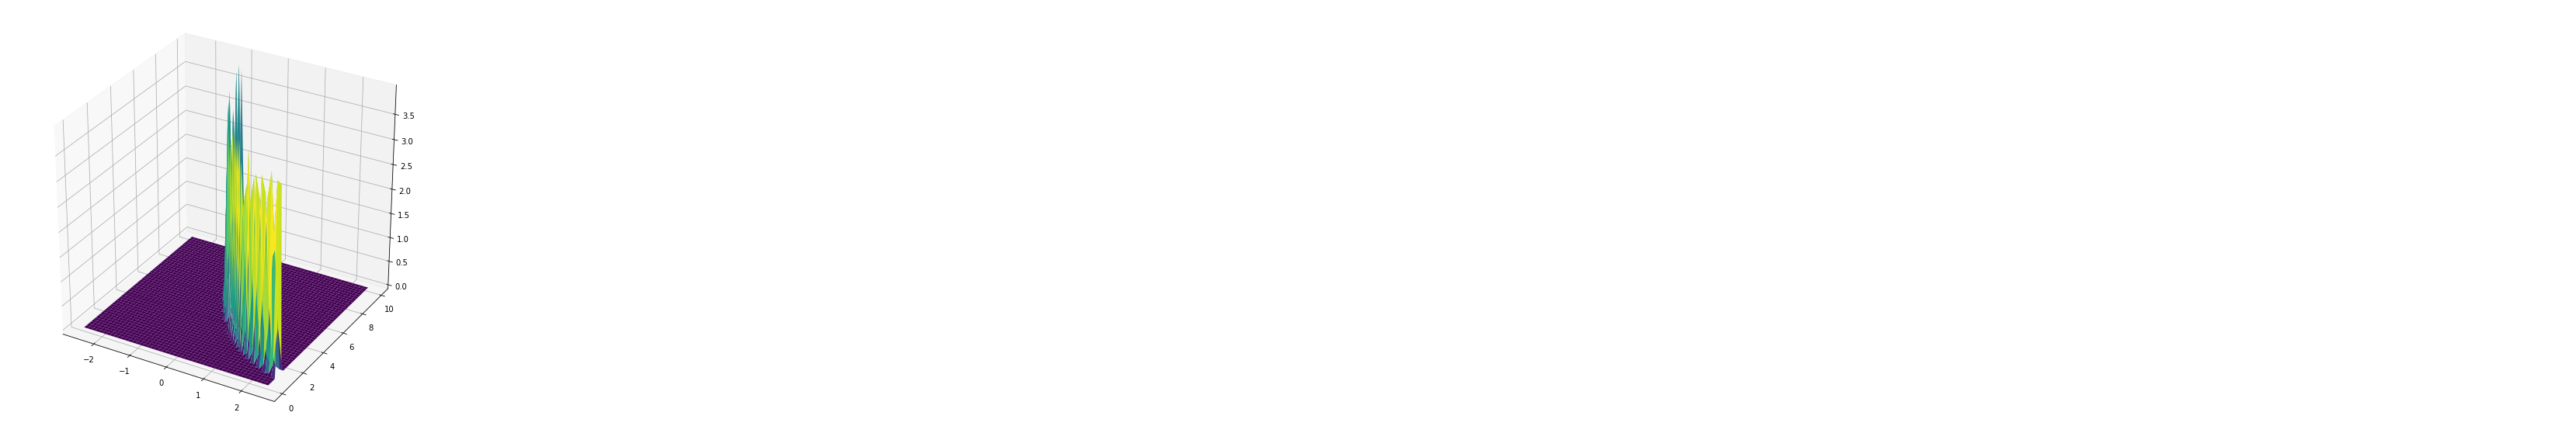

In [118]:
from sympy.plotting import plot3d

n = norm_temp_u.subs({sB0:0.1,B0:5.0,EB:0.65,Tr-Tra:Tdiff})
plot3d(n,(Tdiff,-2.5,2.5),(y,0,10))

This gives a variable with the MGF:

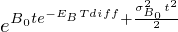

In [77]:
MGF_Y = exp(B*t + (sB0**2 * t**2)/2).subs({Tr-Tra:Tdiff});MGF_Y

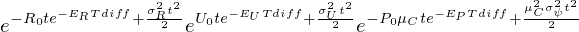

In [78]:
U0,R0,P0 = var("U_0,R_0,P_0")
EU,ER,EP = var("E_U,E_R,E_P")

MGF_U = MGF_Y.subs({B0:U0,EB:EU,sB0:sU});
MGF_R = MGF_Y.subs({B0:R0,EB:ER,sB0:sR,t:-t});
MGF_P = MGF_Y.subs({B0:P0,EB:EP,sB0:sP,t:-t*uC});

MGF_C = MGF_U * MGF_R * MGF_P
MGF_C

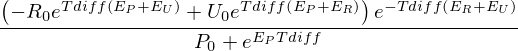

In [111]:
EC = solve(diff(MGF_C,t).subs({t:0})-uC,uC)[0]; EC

In [120]:
EC.subs({Tdiff:0.15,R0:2.5,U0:5.0,P0:99*0.01,ER:0.65,EU:0.32,EP:0.1})

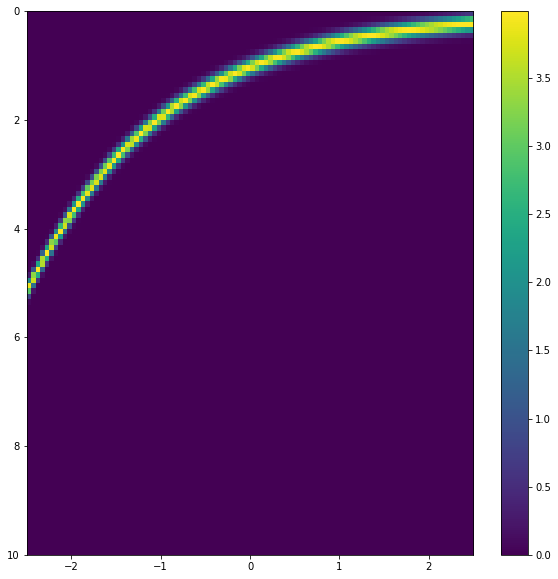

In [45]:
plt.rcParams['figure.figsize'] = 10, 10

norm_temp_u_lam = norm_temp_u.subs({EB:0.65,sB0:0.1,B0:1.0,Tr-Tra:Tdiff})
p_n_temp = lambdify((y,Tdiff),norm_temp_u_lam)

dim = 100
result = np.empty((dim,dim))
y_range = np.linspace(0.01,10,num = dim)
T_range = np.linspace(-2.5,2.5,num = dim)
for i in range(0,dim):
    for j in range(0,dim):
        result[i,j] = (p_n_temp(y_range[i],T_range[j]))

plt.imshow(result,extent=[-2.5,2.5,10,0],aspect="auto")
plt.colorbar()

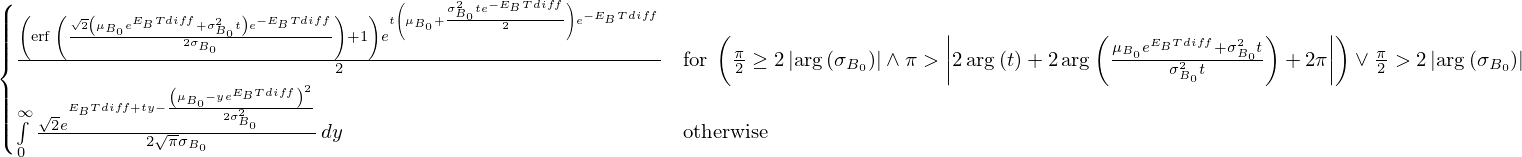

In [56]:
MGF_

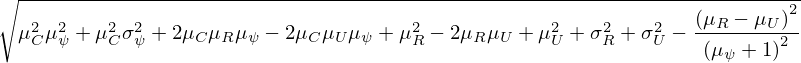

In [24]:
simplify(sqrt(diff(MGF_U * MGF_P * MGF_R,t,2).subs({t:0}) - EC**2))

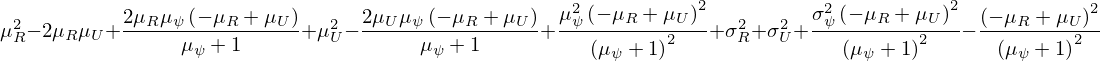

In [26]:
((diff(MGF_U * MGF_R * MGF_P , t,t).subs({t:0}) - EC**2).subs({uC:EC}))

In [423]:
f_pdf = density(N)(EB)
f_EB  = B.subs({Tr-Tra:Tdiff})

E_EB = integrate(f_EB*f_pdf,(EB,-oo,oo))

In [431]:
simplify(E_EB.subs({uEB:0.65,sEB:0.1,B0:1.0}))

# distributions with single species

I think this is just a continuous version of the descrete sum of $N$ species. If we have two random variables representing uptake and respiration

In [425]:
U,R

then their sum gives another normaly distributed variable. This can be shown by the product of their MGFs:

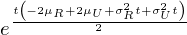

In [431]:
simplify(MGF_U * MGF_R)

We can substitute this new random variable (which i will call $r$) into the explicit solution for biomass at time $t$:

In [533]:
C0,t,c,r,v,z= var("C_0,t,c,r,v,z")
r_N = Normal(mean=uU-uR,std=sU+sR,name='r')
C = C0 * exp(r*t); C

which itself is a new random variable $C$. We can obtain the MGF of $C$ by working out: 
\begin{align}
    E[e^{Ck}] = \int f_C(c) e^{ck}
\end{align}

the density function of C can be obtained with the formula:
\begin{align}
    f_C(c) = \frac{f_r(g^{-1}(c))}{|g'(g^{-1}(c))|}
\end{align}

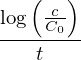

In [534]:
C_inv = solve(C-c,r)[0]; C_inv

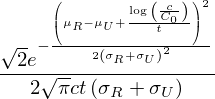

In [513]:
top = density(r_N)(C_inv)
bot = diff(C,r).subs({r:C_inv})

fC = top/bot; fC

In [536]:
z_eq = (C_inv - E(r_N)) / (sR+sU)
c_z = solve(z_eq-z,c)[0]
diff(c_z,z)

In [517]:
mgf = Integral(exp(v*c) * fC,c)

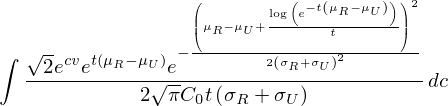

In [524]:
Integral(exp(v*c) * fC.subs({c:c_z}),dz)

In [30]:
from sympy.stats import *

uC,sC= var("\mu_{C},\sigma_{C}");

uU,sU= var("\mu_{U},\sigma_{U}");U = Normal('U',uU,sU)
uR,sR= var("\mu_{R},\sigma_{R}");R = Normal('R',uR,sR)
uP,sP= var("\mu_{\psi},\sigma_{\psi}");P = Normal('\psi',uP,sP)

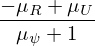

In [19]:
uC = solve(E(U-R-P*uC) - uC,uC)[0]
uC

In [31]:
E(u-R-P*uC)

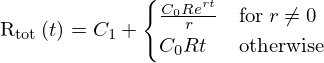

In [145]:
from sympy.assumptions.assume import global_assumptions
global_assumptions.add(Q.positive(r))

Rtot = Function('R_{tot}')(t)
C0,r,t,R = var("C0,r,t,R")

rhs = R*C0*exp(r*t)
dRtot = Rtot.diff(t)

f = Eq(dRtot,rhs);f
sol = dsolve(f); sol

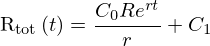

In [159]:
C1 = var("C1")
sol = Eq(Rtot,C1 + (C0*R*exp(r*t))/r) ; sol

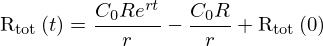

In [165]:
C1_0 = solve(sol.subs({t:0}),C1)[0]
Rtot_sol = sol.subs({C1:C1_0});Rtot_sol

In [176]:
Rtot.subs({t:1})



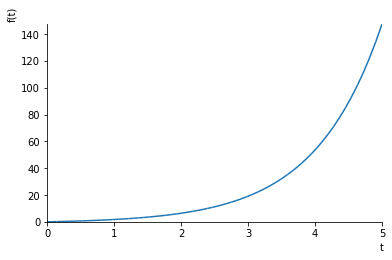

In [110]:
plot(simplify(f.subs({r:0})).subs({C0:1.0,R:1.0}),(t,0,5))

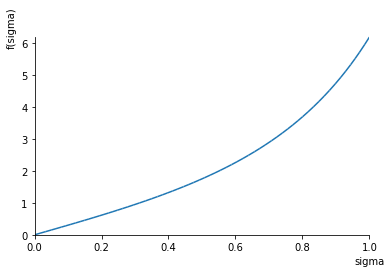

In [21]:
s = var("sigma")

skew = (exp(s**2) +2) * sqrt(exp(s**2)-1)
kurt = exp(4*s**2) + 2 * exp(3*s**2) + 3 * exp(2*s**2) - 3

p_s = plot(skew,(s,0,1))


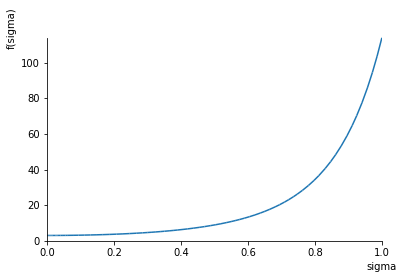

In [18]:
p_s = plot(kurt,(s,0,1))